# Machine Learning Essentials - Summer Semester 2024 // Exercise 04

## Team-Member
### 1. Sushmitha Chandrakumar - 4732591
### 2. Aarohi Verma - 4742978
### 3. Colin Fredynand - 4730221

# Task 1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import coo_matrix, csc_matrix

In [5]:
def construct_X_optimized(M, alphas, Np=None):
    if Np is None:
        Np_min = int(np.ceil(np.sqrt(2) * M))
        if Np_min % 2 == 0:
            Np = Np_min + 1
        else:
            Np = Np_min + 2


    if M % 2 == 0:
        extent = M/2
        j_a, j_b = np.mgrid[-extent : extent+1, -extent : extent+1]
    else:
        extent = (M-1)/2
        j_a, j_b = np.mgrid[-extent : extent+1, -extent : extent+1]
    C = np.row_stack([j_a.flatten(), j_b.flatten()])
    alphas = np.deg2rad(alphas)
    n = np.row_stack([-np.sin(alphas), np.cos(alphas)])

    p = (n.T @ C) + ((Np-1)/2)
    p_split_f, p_split_i = np.modf(p)
    w0 = 1 - p_split_f
    w1 = p_split_f
    i_0 = p_split_i
    i_1 = p_split_i+1

    for i in range(len(alphas)):
        i_0[i,:] += Np * i
        i_1[i,:] += Np * i
    i_indices = np.concatenate([i_0, i_1]).flatten()
    j_indices = np.tile(np.arange(C.shape[1]), 2*len(alphas)).flatten()
    weights = np.concatenate([w0,w1]).flatten()

    # Create the sparse matrix in COO format and convert to CSC for better performance
    X = coo_matrix((weights, (i_indices, j_indices)), shape=(len(alphas) * Np, C.shape[1]), dtype=np.float32)
    X_csc = X.tocsc()  # Convert to CSC format for better subsequent matrix operations
    return X_csc

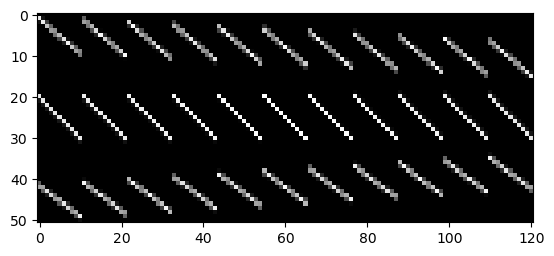

  (1, 0)	0.9165480136871338
  (2, 0)	0.08345198631286621
  (20, 0)	0.9119764566421509
  (21, 0)	0.08802355825901031
  (41, 0)	0.37007108330726624
  (42, 0)	0.6299288868904114
  (1, 1)	0.07787744700908661
  (2, 1)	0.9221225380897522
  (21, 1)	0.912128746509552
  (22, 1)	0.087871253490448
  (42, 1)	0.6269262433052063
  (43, 1)	0.3730737268924713
  (2, 2)	0.23920688033103943
  (3, 2)	0.760793149471283
  (22, 2)	0.9122810363769531
  (23, 2)	0.08771894872188568
  (43, 2)	0.8837814331054688
  (44, 2)	0.11621855199337006
  (3, 3)	0.40053629875183105
  (4, 3)	0.599463701248169
  (23, 3)	0.912433385848999
  (24, 3)	0.08756664395332336
  (43, 3)	0.1406366229057312
  (44, 3)	0.8593633770942688
  (4, 4)	0.5618657469749451
  :	:
  (40, 116)	0.39749178290367126
  (12, 117)	0.599463701248169
  (13, 117)	0.40053629875183105
  (26, 117)	0.08756664395332336
  (27, 117)	0.912433385848999
  (40, 117)	0.8593633770942688
  (41, 117)	0.1406366229057312
  (13, 118)	0.760793149471283
  (14, 118)	0.239206880331

In [6]:
# Example usage
M = 10
alphas = [-33, 1, 42]  # Example angles in degrees
X_optimized = construct_X_optimized(M, alphas)
plt.imshow(X_optimized.toarray(),cmap='grey', interpolation='nearest')
plt.show()
print(X_optimized)
print("Non-zero entries in X:", X_optimized.nnz)

# Task 2

In [8]:
import numpy as np
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt

In [9]:
# Load the data
alphas_77 = np.load(r'data/hs_tomography/alphas_77.npy')
y_77 = np.load(r'data/hs_tomography/y_77.npy')
alphas_195 = np.load(r'data/hs_tomography/alphas_195.npy')
y_195 = np.load(r'data/hs_tomography/y_195.npy')

In [10]:
# Load the precomputed weight matrix for the smaller version
X_77 = np.load(r'data/hs_tomography/X_77.npy', allow_pickle=True)
X_77_sparse = scipy.sparse.csc_matrix(X_77.all())

In [11]:
# Find the number of non-zero entries in X_77
num_nonzero_entries = X_77_sparse.nnz
sparsity = num_nonzero_entries / (X_77_sparse.shape[0] * X_77_sparse.shape[1])
print(f'Number of non-zero entries in X_77: {num_nonzero_entries}')
print(f'Sparsity of X_77: {sparsity}')

Number of non-zero entries in X_77: 1066978
Sparsity of X_77: 0.01834446316753001


In [12]:
def resulting_tomogram(X, y):
    beta = scipy.sparse.linalg.lsqr(X, y,atol=1e-06,btol=1e-06)[0]
    
    mu = np.ndarray((M, M))
    for ja in range(M):
        for jb in range(M):
            mu[ja, jb] = beta[ja + M * jb]
    
    return mu

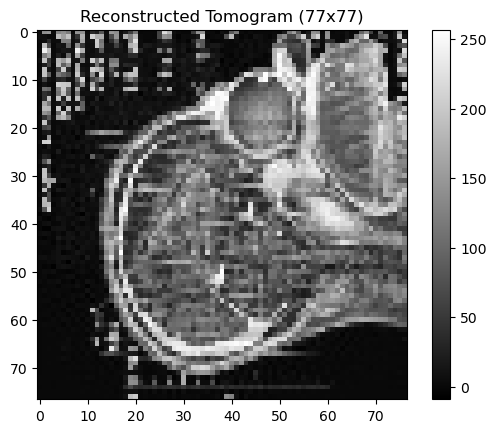

In [13]:
M = 77
result1 = resulting_tomogram(X_77_sparse, y_77)
plt.imshow(result1, cmap='gray', interpolation="nearest")
plt.title('Reconstructed Tomogram (77x77)')
plt.colorbar()
plt.show()

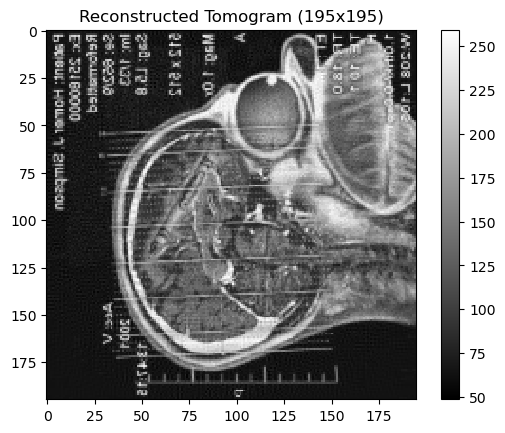

In [14]:
X_195 = construct_X_optimized(195, alphas_195, 275)
M = 195    
result2 = resulting_tomogram(X_195, y_195)
plt.imshow(result2, cmap='gray', interpolation="nearest")
plt.title('Reconstructed Tomogram (195x195)')
plt.colorbar()
plt.show()

In [15]:
# Find the number of non-zero entries in X_195
num_nonzero_entries = X_195.nnz
sparsity = num_nonzero_entries / (X_195.shape[0] * X_195.shape[1])
print(f'Number of non-zero entries in X_195: {num_nonzero_entries}')
print(f'Sparsity of X_195: {sparsity}')

Number of non-zero entries in X_195: 13612950
Sparsity of X_195: 0.007272727272727273


In [16]:
# Analyze the cause of headache
# Assuming the diagnosis and treatment are based on visual inspection of the tomogram
# (This part is subjective and should be replaced with proper medical analysis)
diagnosis = "Possible abnormality detected. Consult a medical professional for detailed diagnosis."
treatment = "Based on the image, further imaging and clinical evaluation are recommended."

print(diagnosis)
print(treatment)

Possible abnormality detected. Consult a medical professional for detailed diagnosis.
Based on the image, further imaging and clinical evaluation are recommended.


# Task 3

In [18]:
import math

In [19]:
# Define a function to reconstruct and plot the tomogram for a given number of projections
def reconstruct_tomogram(M,Np,n_alphas,X,alphas,y):
    for n_alphas_ in range(n_alphas, 1, -1 * math.ceil(n_alphas / 20)):
        indices = np.linspace(0, len(alphas) - 1, n_alphas_, dtype=int)
        alphas_ = alphas[indices]
        y_ = y[indices]
        x_ = construct_X_optimized(M, alphas_, Np)
        print(f"Tomogram for {n_alphas_} angles:")
        result = resulting_tomogram(X, y)
        plt.imshow(result, cmap='gray', interpolation="nearest")
        plt.title(f'Reconstructed Tomogram ({M} x {M})')
        plt.colorbar()
        plt.show()

Tomogram for 90 angles:


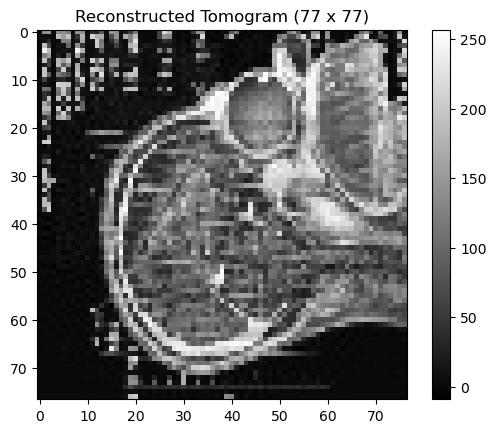

Tomogram for 85 angles:


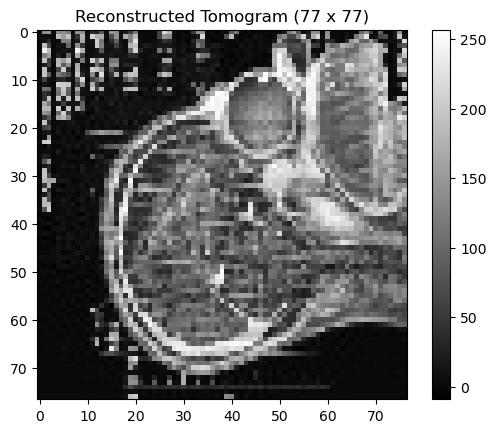

Tomogram for 80 angles:


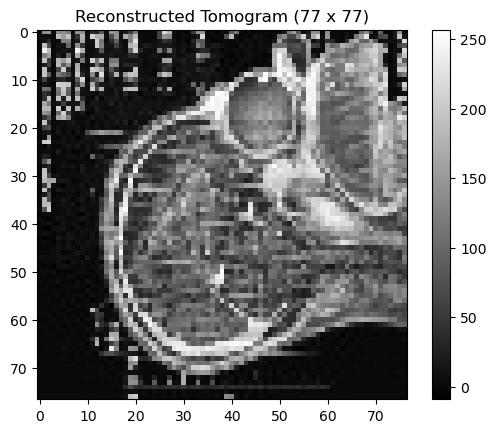

Tomogram for 75 angles:


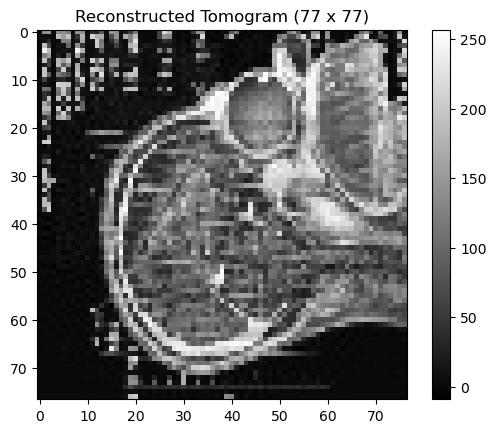

Tomogram for 70 angles:


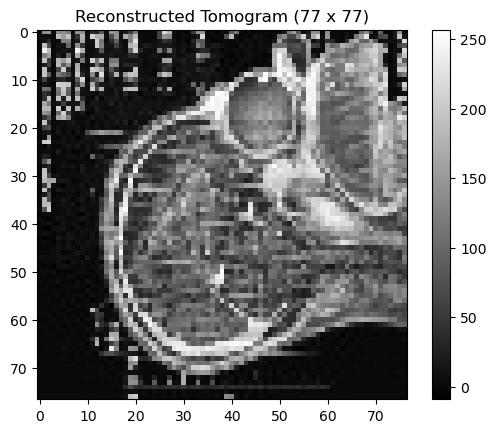

Tomogram for 65 angles:


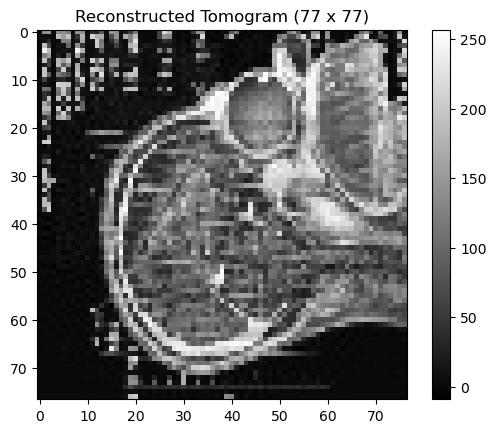

Tomogram for 60 angles:


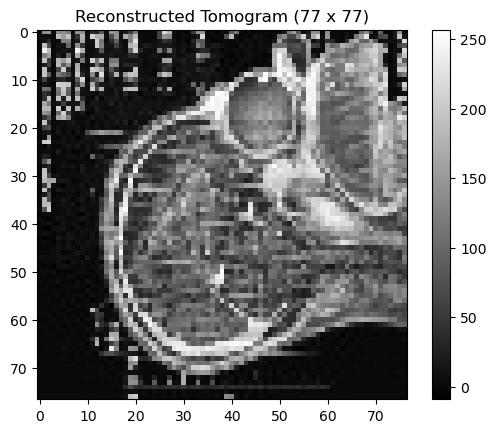

Tomogram for 55 angles:


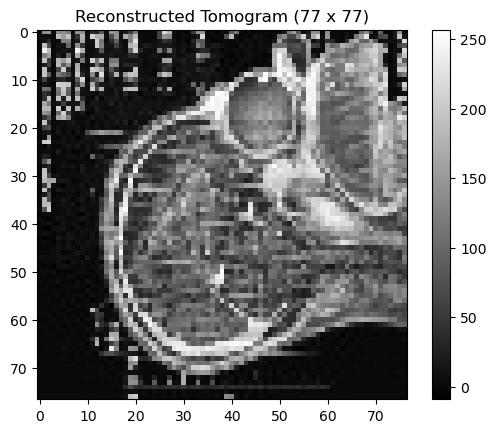

Tomogram for 50 angles:


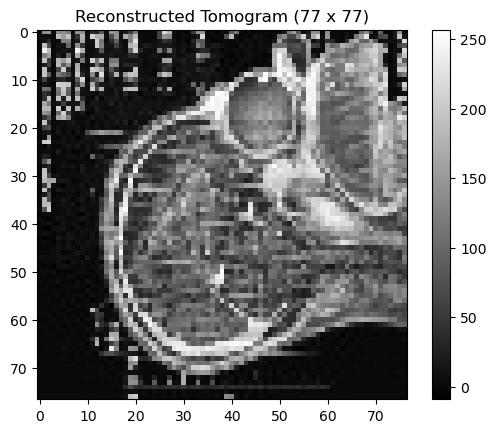

Tomogram for 45 angles:


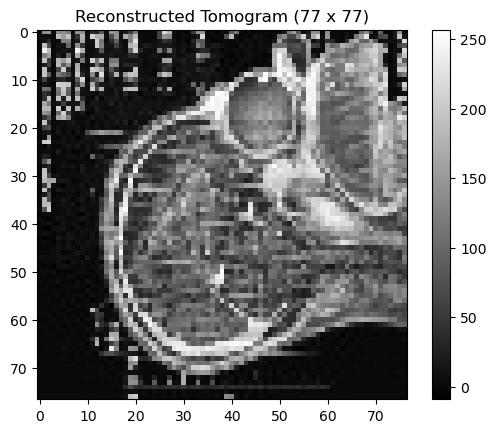

Tomogram for 40 angles:


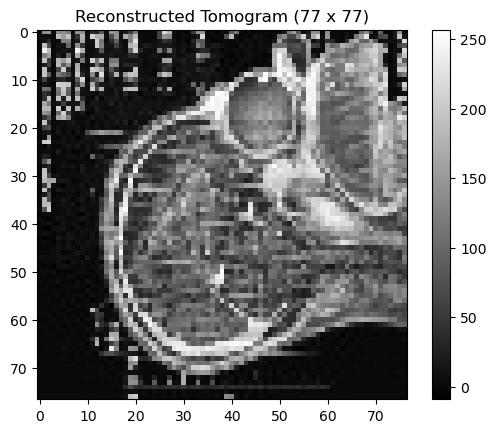

Tomogram for 35 angles:


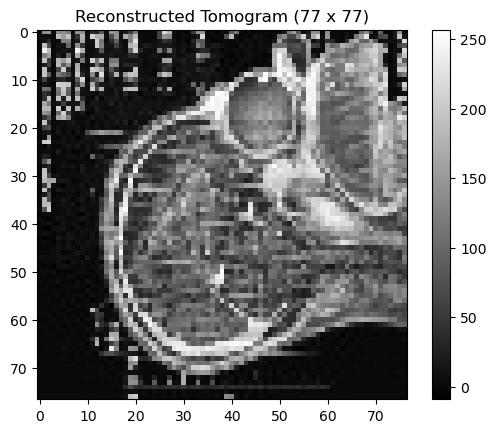

Tomogram for 30 angles:


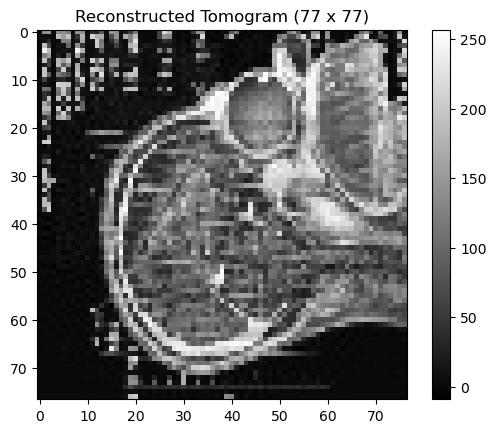

Tomogram for 25 angles:


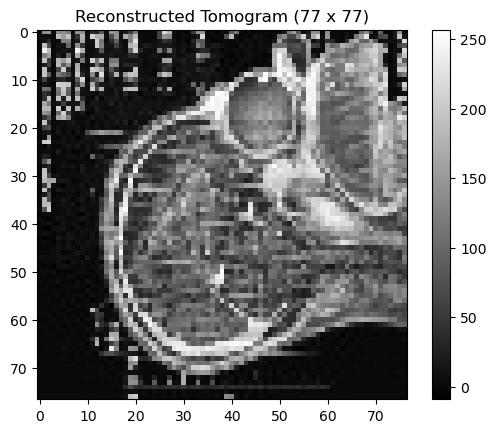

Tomogram for 20 angles:


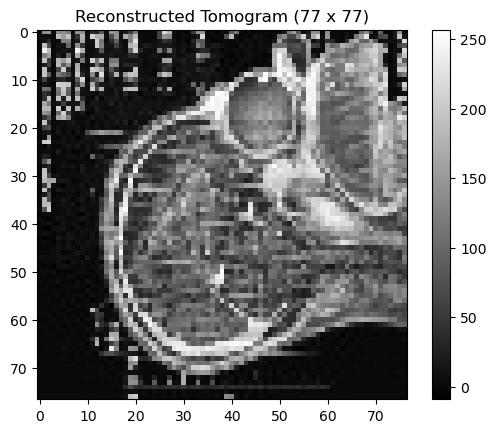

Tomogram for 15 angles:


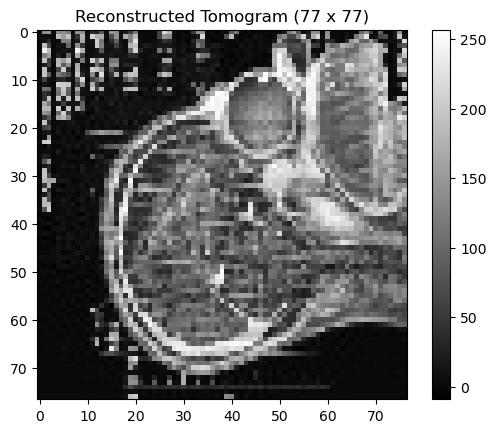

Tomogram for 10 angles:


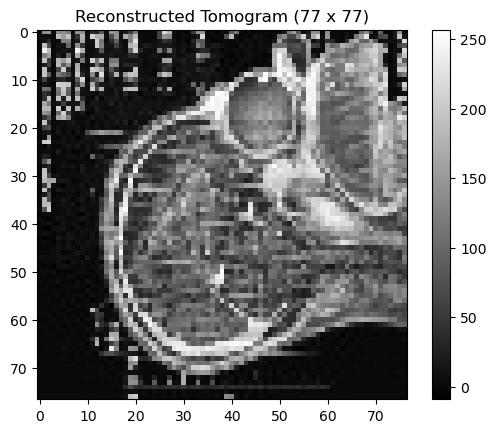

Tomogram for 5 angles:


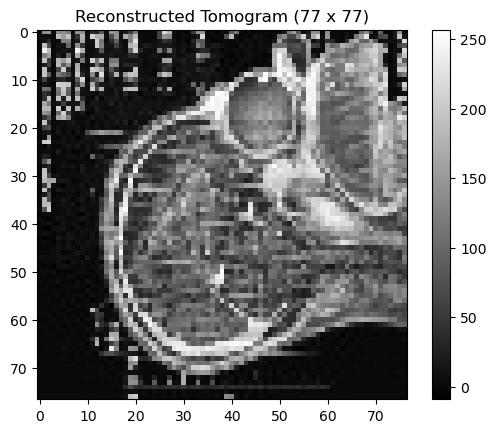

In [20]:
# for small data
M = 77
Np = 109
alphas_N_77 = 90
reconstruct_tomogram(M,Np,alphas_N_77,X_77_sparse,alphas_77,y_77)

Tomogram for 179 angles:


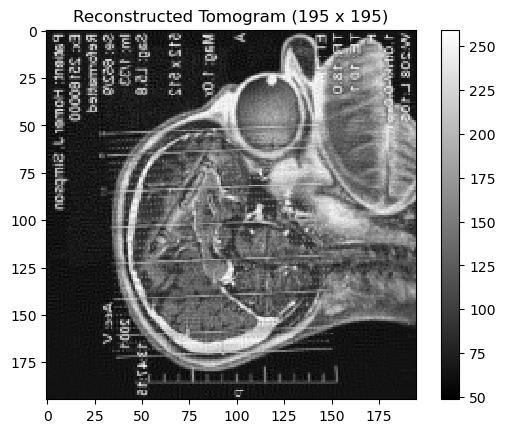

Tomogram for 170 angles:


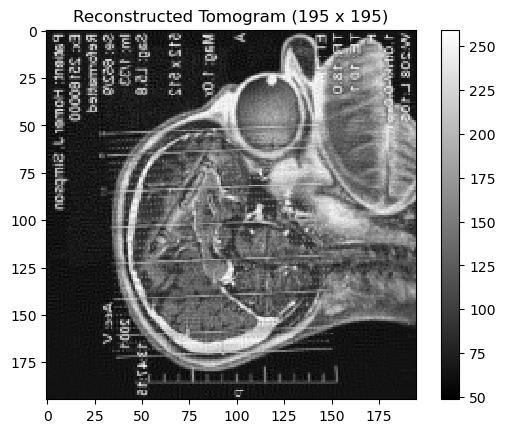

Tomogram for 161 angles:


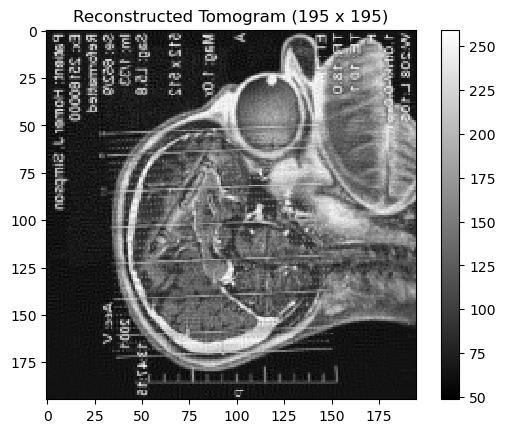

Tomogram for 152 angles:


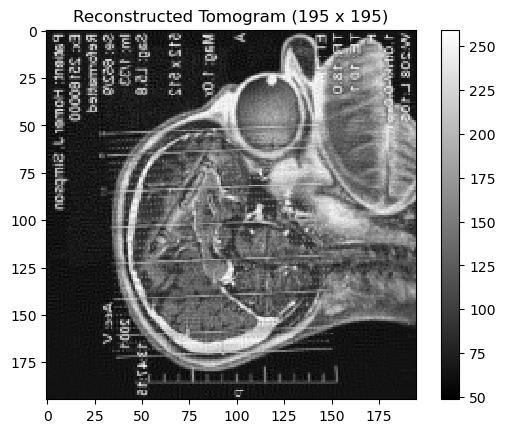

Tomogram for 143 angles:


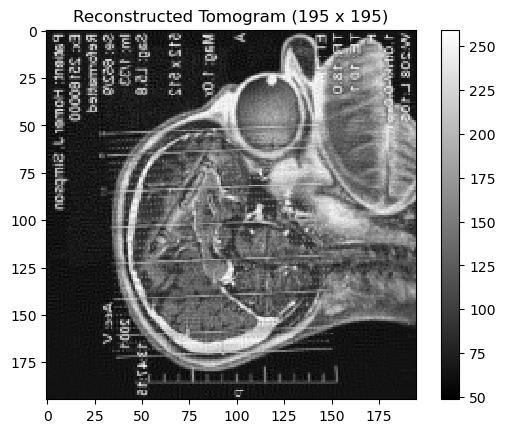

Tomogram for 134 angles:


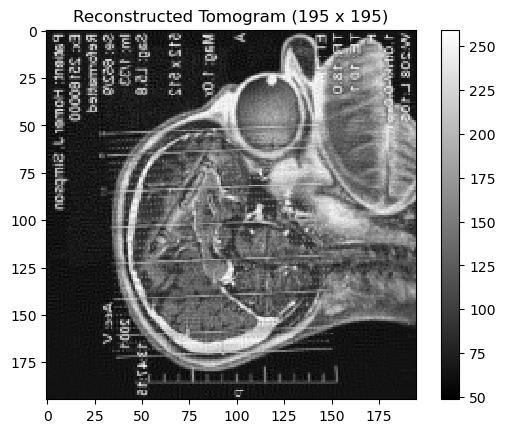

Tomogram for 125 angles:


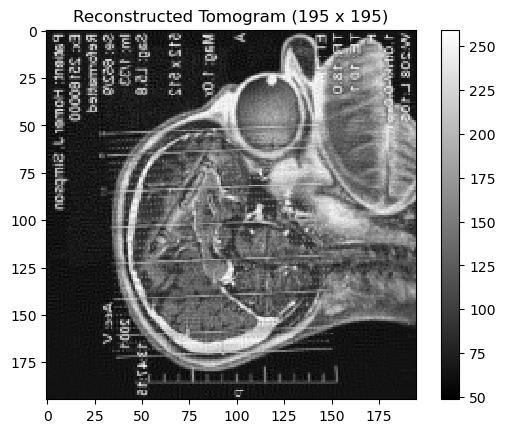

Tomogram for 116 angles:


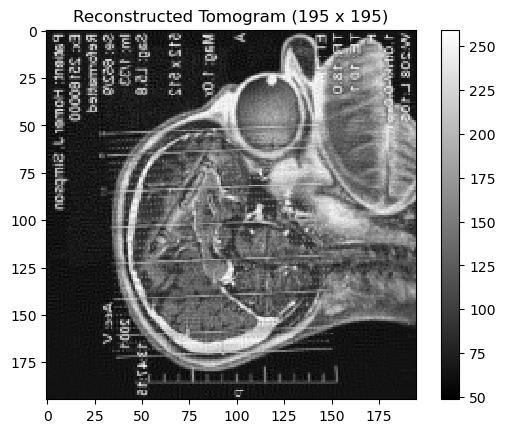

Tomogram for 107 angles:


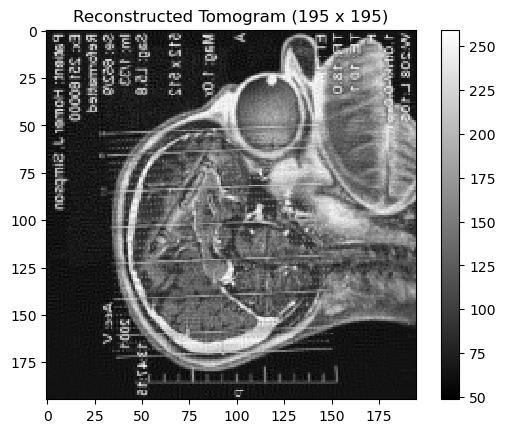

Tomogram for 98 angles:


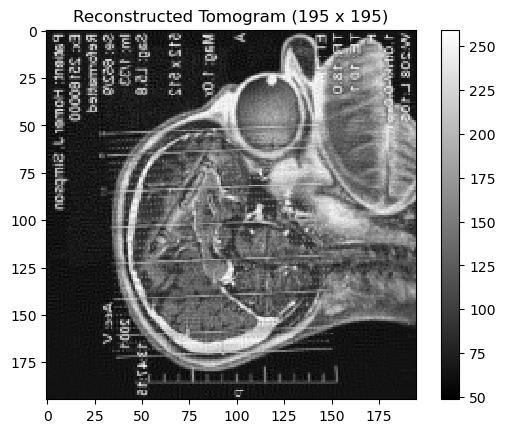

Tomogram for 89 angles:


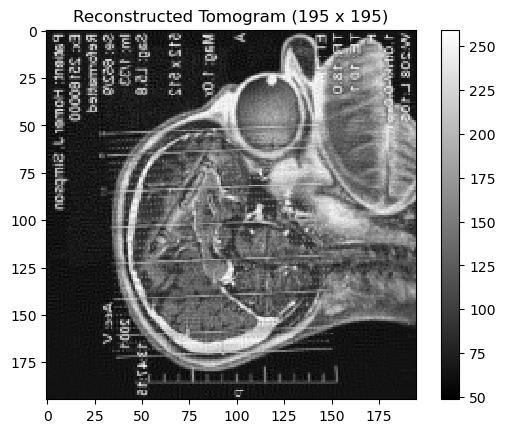

Tomogram for 80 angles:


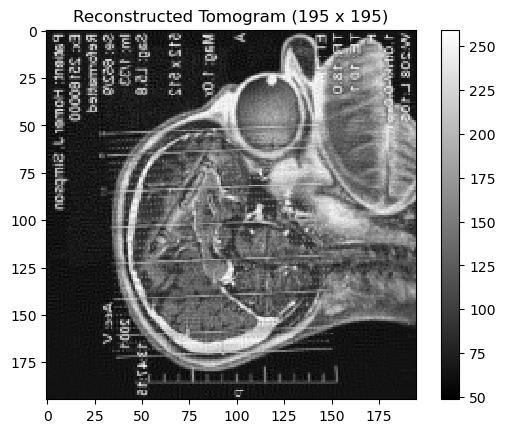

Tomogram for 71 angles:


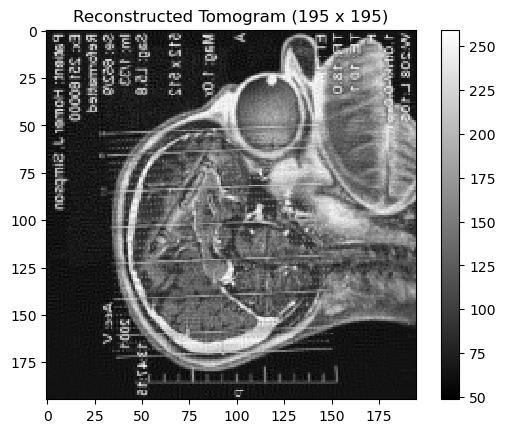

Tomogram for 62 angles:


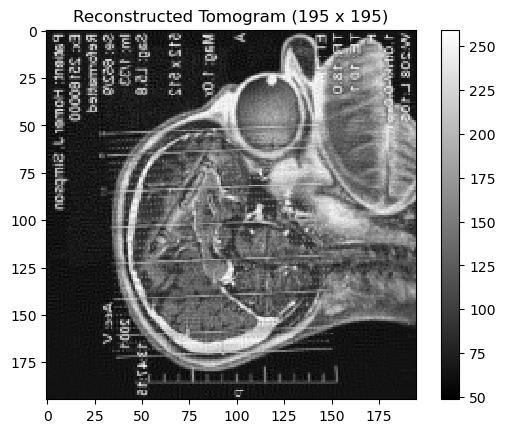

Tomogram for 53 angles:


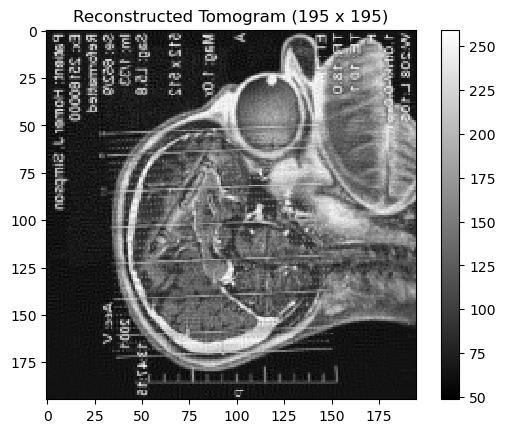

Tomogram for 44 angles:


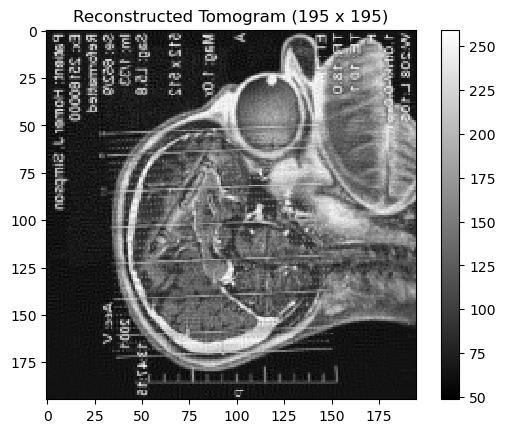

Tomogram for 35 angles:


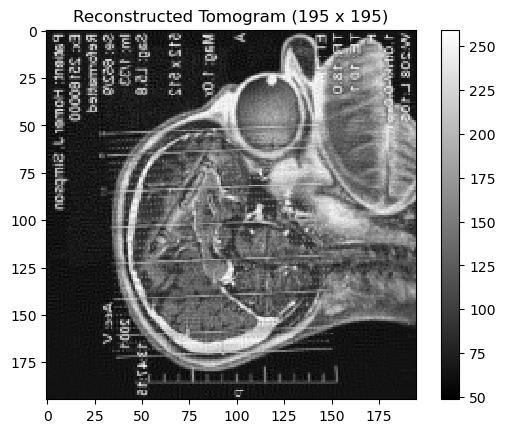

Tomogram for 26 angles:


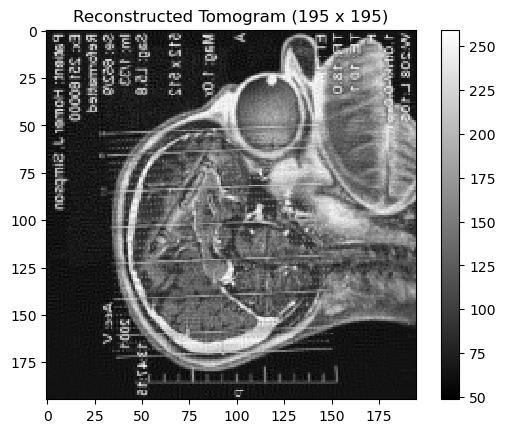

Tomogram for 17 angles:


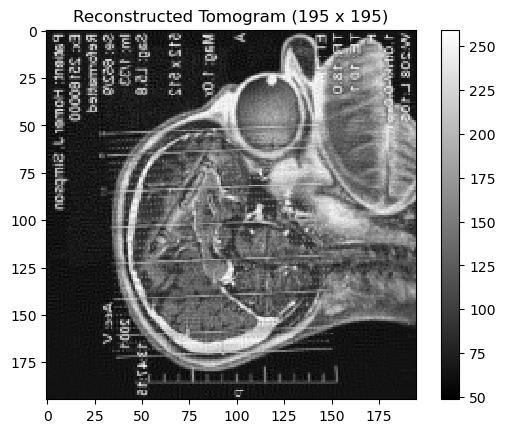

Tomogram for 8 angles:


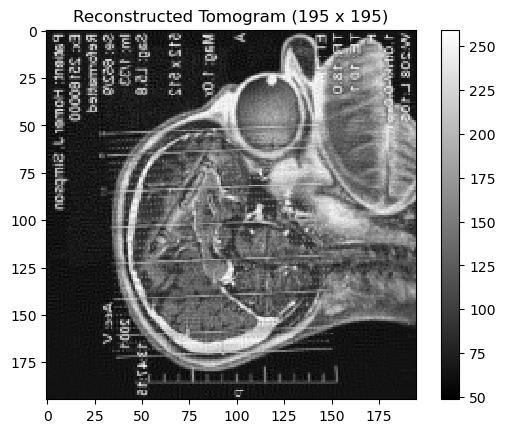

In [21]:
# for big data
M = 195
Np = 275
alphas_N_195 = 179
reconstruct_tomogram(M,Np,alphas_N_195,X_195,alphas_195,y_195)